In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps
import os
from api_keys import g_key
from api_keys import weather_api_key

In [2]:
data_total=pd.read_csv("../cleaned_csvs/total_data.csv", parse_dates=["FL_DATE"])
data_total_reduced=data_total[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#only flights leaving cleveland 
data_total_departures=data_total_reduced.loc[data_total_reduced["ORIGIN"]=="CLE"]
data_total_departures

,FL_DATE,ORIGIN,DEST,DEST_CITY_NAME
30,2016-04-01,CLE,DFW,"Dallas/Fort Worth, TX"
31,2016-04-02,CLE,DFW,"Dallas/Fort Worth, TX"
32,2016-04-03,CLE,DFW,"Dallas/Fort Worth, TX"
33,2016-04-04,CLE,DFW,"Dallas/Fort Worth, TX"
34,2016-04-05,CLE,DFW,"Dallas/Fort Worth, TX"
...,...,...,...,...
349788,2020-03-11,CLE,ORD,"Chicago, IL"
349790,2020-03-11,CLE,DEN,"Denver, CO"
349792,2020-03-11,CLE,ORD,"Chicago, IL"
349793,2020-03-11,CLE,SFO,"San Francisco, CA"


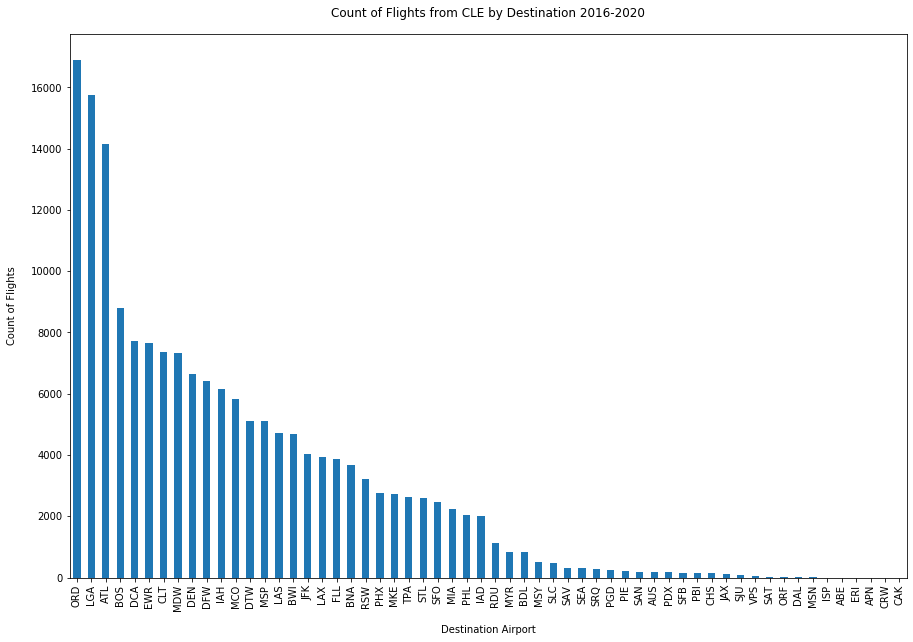

In [6]:
data_total_departures["DEST"].value_counts().plot(kind='bar', figsize=(15,10))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination 2016-2020", y=1.02);

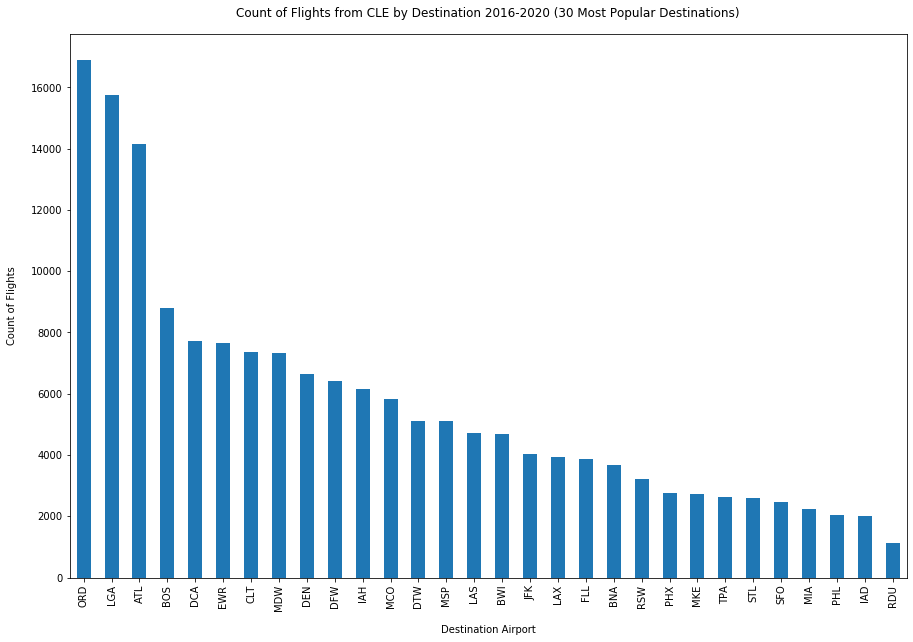

In [7]:
data_total_departures["DEST"].value_counts()[0:30].plot(kind="bar", figsize=(15,10))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination 2016-2020 (30 Most Popular Destinations)", y=1.02);

In [8]:
date=data_total_departures["FL_DATE"]
season=date.dt.quarter
data_total_departures["SEASON"]=season

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
winter=data_total_departures.loc[data_total_departures["SEASON"]==1]
winter["DEST"].value_counts()[0:30]

ORD    4742
LGA    4571
ATL    3900
DCA    2408
CLT    2347
BOS    2183
EWR    2123
MDW    1908
MCO    1880
IAH    1866
DEN    1578
DTW    1534
DFW    1512
RSW    1488
FLL    1454
LAS    1440
BWI    1343
MSP    1287
JFK    1283
LAX    1053
TPA     988
PHX     973
BNA     906
MKE     883
MIA     855
STL     765
IAD     667
PHL     612
SFO     554
RDU     280
Name: DEST, dtype: int64

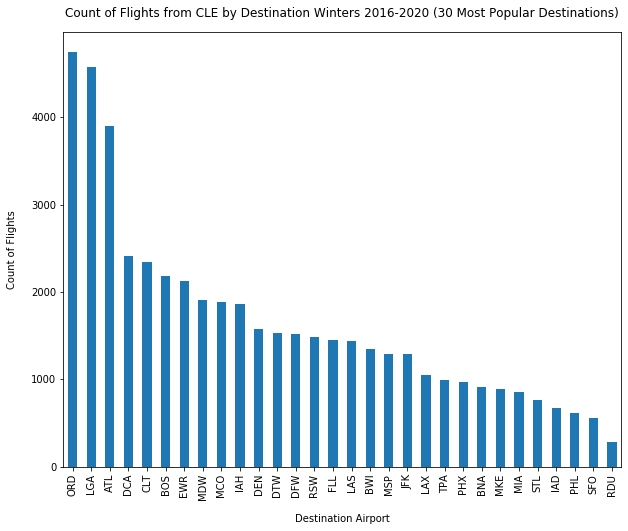

In [11]:
winter["DEST"].value_counts()[0:30].plot(kind="bar", figsize=(10,8))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination Winters 2016-2020 (30 Most Popular Destinations)", y=1.02);

In [13]:
spring=data_total_departures.loc[data_total_departures["SEASON"]==2]
spring["DEST"].value_counts()[0:30]

ORD    3562
LGA    3321
ATL    3271
BOS    2040
EWR    1820
DCA    1679
MDW    1625
CLT    1589
DFW    1574
DEN    1497
IAH    1329
MSP    1228
MCO    1227
DTW    1124
LAS    1110
BWI    1046
BNA     919
LAX     859
FLL     798
JFK     793
PHX     653
SFO     646
MKE     605
RSW     567
STL     510
TPA     455
MIA     431
PHL     395
IAD     368
RDU     333
Name: DEST, dtype: int64

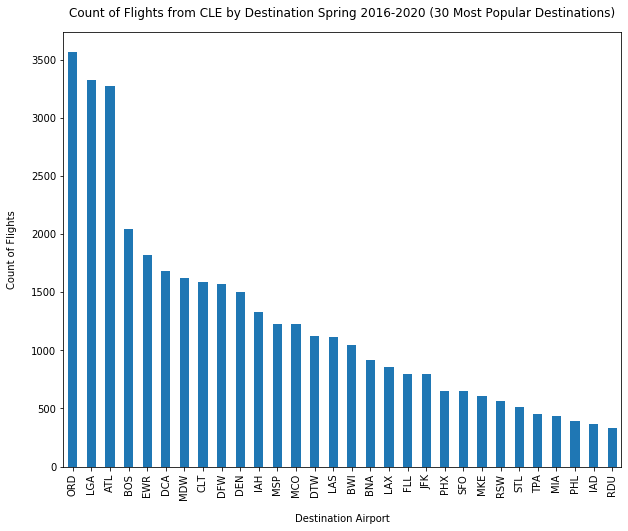

In [14]:
spring["DEST"].value_counts()[0:30].plot(kind="bar", figsize=(10,8))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination Spring 2016-2020 (30 Most Popular Destinations)", y=1.02);

In [15]:
summer=data_total_departures.loc[data_total_departures["SEASON"]==3]
summer["DEST"].value_counts()[0:30]

ORD    4197
LGA    4024
ATL    3644
BOS    2434
DEN    2040
MDW    1973
EWR    1923
DCA    1863
DFW    1854
CLT    1780
IAH    1609
MSP    1355
MCO    1326
DTW    1226
BWI    1158
LAX    1115
LAS    1091
BNA    1048
JFK    1034
SFO     776
FLL     745
STL     690
MKE     586
PHX     513
PHL     484
TPA     475
IAD     475
MIA     469
RSW     427
MYR     370
Name: DEST, dtype: int64

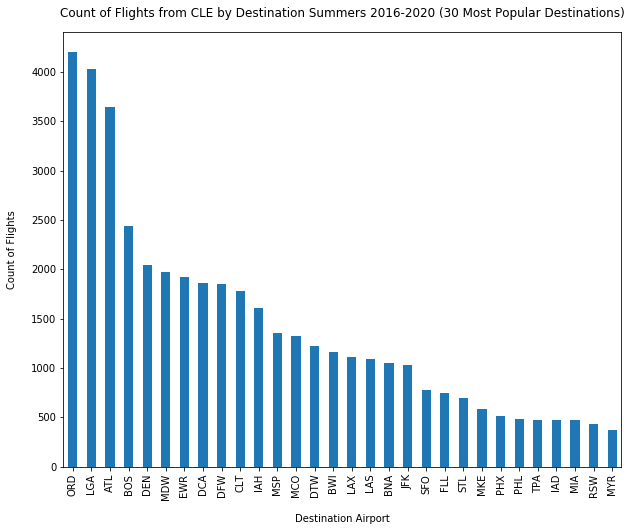

In [16]:
summer["DEST"].value_counts()[0:30].plot(kind="bar", figsize=(10,8))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination Summers 2016-2020 (30 Most Popular Destinations)", y=1.02);

In [17]:
fall=data_total_departures.loc[data_total_departures["SEASON"]==4]
fall["DEST"].value_counts()[0:30]

ORD    4400
LGA    3825
ATL    3340
BOS    2153
MDW    1821
EWR    1793
DCA    1782
CLT    1643
DEN    1538
DFW    1472
MCO    1396
IAH    1349
DTW    1236
MSP    1225
BWI    1141
LAS    1091
JFK     909
LAX     895
FLL     879
BNA     802
RSW     725
TPA     704
MKE     653
STL     619
PHX     614
PHL     539
IAD     505
SFO     498
MIA     473
BDL     196
Name: DEST, dtype: int64

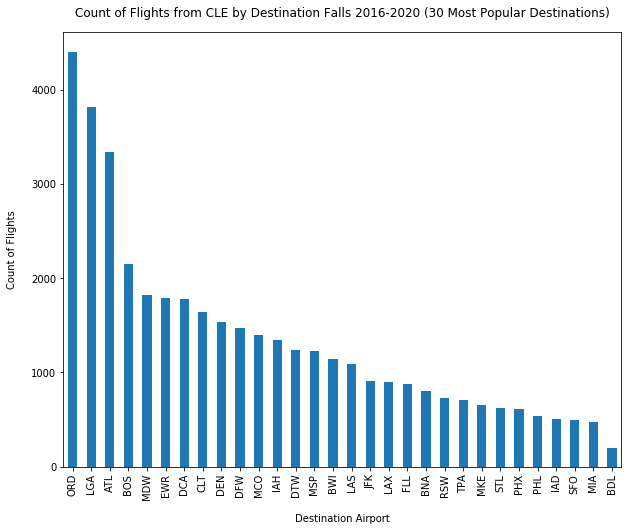

In [18]:
fall["DEST"].value_counts()[0:30].plot(kind="bar", figsize=(10,8))
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination Falls 2016-2020 (30 Most Popular Destinations)", y=1.02);

In [20]:
cities=data_total_departures["DEST_CITY_NAME"].value_counts()[0:30]
df_cities = pd.DataFrame(cities)
df_cities = df_cities.reset_index()
df_cities.columns = ['City', 'counts']
df_cities

,City,counts
0,"Chicago, IL",24228
1,"New York, NY",19760
2,"Atlanta, GA",14155
3,"Washington, DC",9747
4,"Boston, MA",8810
5,"Newark, NJ",7659
6,"Charlotte, NC",7359
7,"Denver, CO",6653
8,"Dallas/Fort Worth, TX",6412
9,"Houston, TX",6153


In [21]:
cities=df_cities["City"].unique()
cities

array(['Chicago, IL', 'New York, NY', 'Atlanta, GA', 'Washington, DC',
       'Boston, MA', 'Newark, NJ', 'Charlotte, NC', 'Denver, CO',
       'Dallas/Fort Worth, TX', 'Houston, TX', 'Orlando, FL',
       'Detroit, MI', 'Minneapolis, MN', 'Las Vegas, NV', 'Baltimore, MD',
       'Los Angeles, CA', 'Fort Lauderdale, FL', 'Nashville, TN',
       'Fort Myers, FL', 'Phoenix, AZ', 'Milwaukee, WI', 'Tampa, FL',
       'St. Louis, MO', 'San Francisco, CA', 'Miami, FL',
       'Philadelphia, PA', 'Raleigh/Durham, NC', 'Myrtle Beach, SC',
       'Hartford, CT', 'New Orleans, LA'], dtype=object)

In [22]:
url="https://maps.googleapis.com/maps/api/geocode/json?address="

def remove(string): 
    return string.replace(" ", "")

lat=[]
lng=[]

for city in cities:
    city=(remove(city))
    query_url=(url+city+"&key="+g_key)
    response=requests.get(query_url).json() 
    lat.append(response["results"][0]["geometry"]["location"]["lat"])
    lng.append(response["results"][0]["geometry"]["location"]["lng"])

In [23]:
cities_df=pd.DataFrame()


In [24]:
cities_df["CITY"]=cities

In [25]:
cities_df["LAT"]=lat

In [26]:
cities_df["LNG"]=lng

In [27]:
locations=cities_df[["LAT", "LNG"]]
fig = gmaps.figure(center=(41.850033, -87.6500523), zoom_level=3.8)
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [192]:
data_2019=pd.read_csv("../cleaned_csvs/2019_data.csv", parse_dates=["FL_DATE"])
data_2019_reduced=data_2019[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]
data_2019_departures=data_2019_reduced.loc[data_2019_reduced["ORIGIN"]=="CLE"]
cities_2019=data_2019_departures["DEST"].value_counts()[0:30]
cities_2019
df_cities_2019 = pd.DataFrame(cities_2019)
df_cities_2019 = df_cities_2019.reset_index()
df_cities_2019

,index,DEST
0,ORD,5066
1,LGA,4694
2,ATL,3647
3,CLT,2431
4,DCA,2282
5,EWR,2212
6,BOS,2179
7,DEN,1938
8,JFK,1801
9,IAH,1708


In [199]:
data_2020=pd.read_csv("../cleaned_csvs/cle_flights_2020.csv", parse_dates=["FL_DATE"])
data_2020_reduced=data_2020[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]
data_2020_departures=data_2020_reduced.loc[(data_2020_reduced["ORIGIN"]=="CLE")]
cities_2020=data_2020_departures["DEST"].value_counts()[0:30]
cities_2020
df_cities_2020 = pd.DataFrame(cities_2020)
df_cities_2020 = df_cities_2020.reset_index()
df_cities_2020

,index,DEST
0,ORD,1069
1,LGA,952
2,ATL,825
3,CLT,617
4,BOS,505
5,MCO,504
6,DEN,423
7,EWR,422
8,DCA,410
9,RSW,400


In [194]:
data_2016=pd.read_csv("../cleaned_csvs/cle_flights_2016.csv", parse_dates=["FL_DATE"])
data_2016_reduced=data_2016[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]
data_2016_departures=data_2016_reduced.loc[data_2016_reduced["ORIGIN"]=="CLE"]
cities_2016=data_2016_departures["DEST"].value_counts()[0:30]
df_cities_2016 = pd.DataFrame(cities_2016)
df_cities_2016 = df_cities_2016.reset_index()



In [195]:
data_2017=pd.read_csv("../cleaned_csvs/Data_2017.csv", parse_dates=["FL_DATE"])
data_2017_reduced=data_2017[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]
data_2017_departures=data_2017_reduced.loc[data_2017_reduced["ORIGIN"]=="CLE"]
cities_2017=data_2017_departures["DEST"].value_counts()[0:30]
df_cities_2017 = pd.DataFrame(cities_2017)
df_cities_2017 = df_cities_2017.reset_index()

In [196]:
data_2018=pd.read_csv("../cleaned_csvs/Cleveland_2018.csv", parse_dates=["FL_DATE"])
data_2018_reduced=data_2018[["FL_DATE", "ORIGIN", "DEST", "DEST_CITY_NAME"]]
data_2018_departures=data_2018_reduced.loc[data_2018_reduced["ORIGIN"]=="CLE"]
cities_2018=data_2018_departures["DEST"].value_counts()[0:30]
df_cities_2018 = pd.DataFrame(cities_2018)
df_cities_2018 = df_cities_2018.reset_index()

In [203]:
df_total=df_cities_2016.merge(df_cities_2017, on="index", how="outer")
df_total
#del df_total['index_x']
#del df_total['index_y']
df_total=df_total.rename(columns={"DEST_x": "2016", "DEST_y": "2017"})
df_total=df_total.merge(df_cities_2018, on="index", how="outer")
df_total=df_total.rename(columns={"DEST": "2018"})
df_total
df_total=df_total.merge(df_cities_2019, on="index", how="outer")
df_total=df_total.rename(columns={"DEST": "2019"})
df_total=df_total.merge(df_cities_2020, on="index", how="outer")
df_total=df_total.rename(columns={"DEST": "2020", "index": "DEST airport"})
df_total.fillna(0,inplace=True)
df_total

,DEST airport,2016,2017,2018,2019,2020
0,ATL,3068.0,3345.0,3270.0,3647.0,825.0
1,ORD,2931.0,3264.0,4571.0,5066.0,1069.0
2,LGA,2539.0,3116.0,4440.0,4694.0,952.0
3,BOS,2051.0,2148.0,1927.0,2179.0,505.0
4,MDW,1937.0,1845.0,1625.0,1602.0,318.0
5,EWR,1634.0,1593.0,1798.0,2212.0,422.0
6,DEN,1594.0,1355.0,1343.0,1938.0,423.0
7,DFW,1556.0,1478.0,1462.0,1682.0,234.0
8,DCA,1547.0,1584.0,1909.0,2282.0,410.0
9,IAH,1367.0,1152.0,1584.0,1708.0,342.0


Text(0.5, 1.02, 'Count of Flights from CLE by Destination 2016-2020')

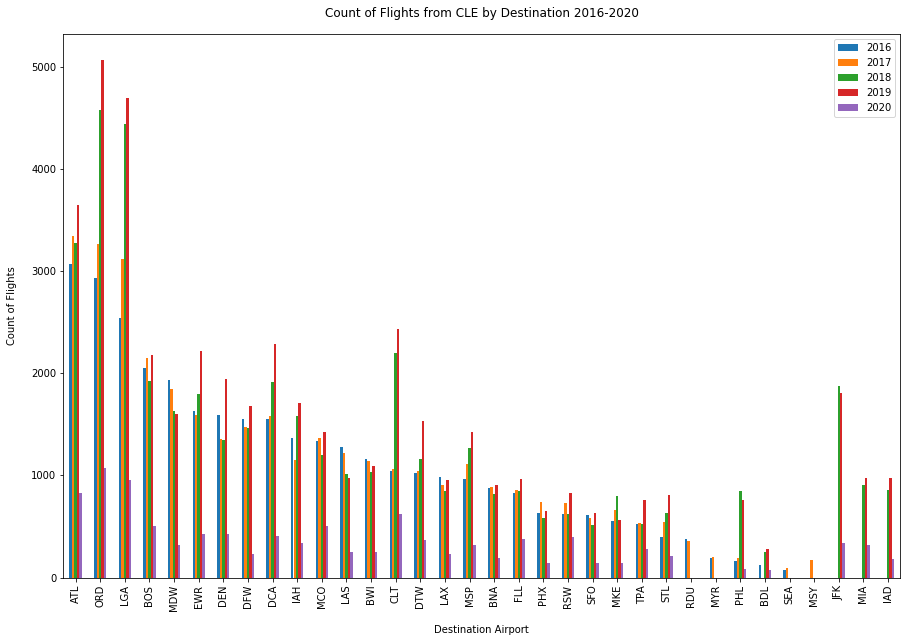

In [205]:
df_total.plot(x="DEST airport", y=["2016", "2017", "2018", "2019", "2020"], kind="bar", figsize=(15,10), width = 0.5
)
plt.xlabel("Destination Airport", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Count of Flights from CLE by Destination 2016-2020", y=1.02)